# Binomial Distribution,二项分布


将伯努利试验独立地重复n次，并统计其中得到结果0（或结果1）的次数，该试验称为n重伯努利试验。

n重伯努利试验的结果是一个遵循二项分布的随机变量，记为$X \sim Binom(n,p)$。二项分布有两个参数，其中p和伯努利分布一样表示X取值为1的概率，而n则表示伯努利试验的重数。很显然$X \sim Bern(p)$是$X \sim Binom(n,p)$在n=1时的特例。二项分布的概率质量函数PMF如下所示：
$$P(x;p,n)=\binom{n}{k}p^x(1-p)^{(n-x)}, x=0,1,2,...,n$$
其中，$\binom{n}{k}=\frac{n!}{(k!)(n-k)!}$


In [2]:
import random
import numpy as np
from scipy.stats import bernoulli, binom
%matplotlib inline
from matplotlib import pyplot as plt

二项分布的几个常用的统计特征分别如下所示（注意，离散随机变量的统计特征计算不使用积分，而是用求和）：
$$𝐸(𝑋)=∑_{𝑥=0}^{n}x𝑝^x(1-p)^{(1−x)}=n𝑝$$
 
$$𝐷(𝑋)=∑𝑥∈(0,1)(𝑥−𝐸(𝑋))2𝑝𝑥⋅(1−𝑝)(1−𝑥)=𝑝(1−𝑝)$$
 
$$𝑆𝑘𝑒𝑤(𝑋)=∑𝑥∈(0,1)(𝑥−𝐸(𝑋)𝜎)3𝑝𝑥⋅(1−𝑝)(1−𝑥)=1−2𝑝𝑝(1−𝑝)⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√$$
 
$$𝐾𝑢𝑟𝑡𝑜𝑠𝑖𝑠(𝑋)=∑𝑥∈(0,1)(𝑥−𝐸(𝑋)𝜎)4𝑝𝑥⋅(1−𝑝)(1−𝑥)=3𝑝2−3𝑝+1𝑝(1−𝑝)$$

### Common used statistics characteristics

In [4]:
p=0.4
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('Statistics characteristics of Bernoulli distribution, for p ={}'.format(p))
print('mean = {0}, var = {1}, skew = {2}, kurt = {3}'.format(mean, var, skew, kurt))

n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('statistics characteristics of Binomial distribution, for p={}, n={}'.format(p,n))
print('mean = {0}, var = {1}, skew = {2}, kurt = {3}'.format(mean, var, skew, kurt))

Statistics characteristics of Bernoulli distribution, for p =0.4
mean = 0.4, var = 0.24, skew = 0.40824829046386296, kurt = -1.8333333333333337
statistics characteristics of Binomial distribution, for p=0.4, n=5
mean = 2.0, var = 1.2, skew = 0.18257418583505533, kurt = -0.3666666666666668


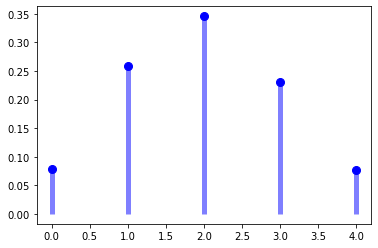

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

## DIY implementation

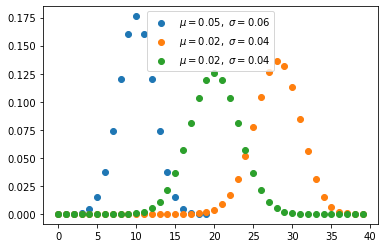

In [6]:
import operator as op
from functools import reduce

def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

for ls in [(0.5, 20), (0.7, 40), (0.5, 40)]:
    p, n_experiment = ls[0], ls[1]
    x = np.arange(n_experiment)
    y, u, s = binomial(n_experiment, p)
    plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))

plt.legend()
plt.savefig('graph/binomial.png')
plt.show()